In [1]:
%matplotlib inline
import calcRefractiveIndex
from calcRefractiveIndex import refraction as refraction
from calcRefractiveIndex import diff_refraction as diff
from matplotlib import pyplot as plt
import numpy as np

In [17]:
def arcsec(var):
    return var * 3600.

In [3]:
def minmax(var):
    return [np.min(var),np.max(var)]

In [4]:
diff(20.,wavelength=354.,bandwidth=66.)*arcsec

0.40158098707886308

In [5]:
base_temp = 10.
temps=np.array(range(100))/3.
temps = base_temp + temps - np.mean(temps)
print(temps.size)
print(minmax(temps))

100
[-6.5, 26.5]


In [6]:
base_pressure = 586.7 # mm Hg
base_pressure_atm=base_pressure / 760.
print(base_pressure_atm)

0.771973684211


In [7]:
pressure_delta = 0.001
pressure_range = 0.1
pressures = (np.array(range(1+int(2*pressure_range/pressure_delta)))* pressure_delta - pressure_range /2.) * base_pressure_atm + base_pressure_atm
print(pressures.size)
print(minmax(pressures))

201
[0.733375, 0.88776973684210536]


In [8]:
angle_delta = 1.
angle_max = 75.
zenith_angles = np.array(range(1+int(2*angle_max/angle_delta))) * angle_delta - angle_max
print(zenith_angles.size)
print(minmax(zenith_angles))

151
[-75.0, 75.0]


Now create a 3D array of differential refraction amplitudes as a function of zenith angle, temperature, and pressure

In [9]:
diff_refract_arr = np.zeros([zenith_angles.size, temps.size, pressures.size])

In [10]:
wavelength = 354.
bandwidth = 66.
test = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = base_temp, 
            atmospheric_pressure = base_pressure_atm)

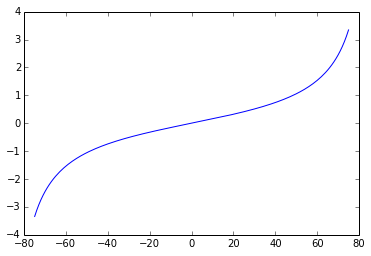

In [24]:
plt.plot(zenith_angles,arcsec(test))
plt.savefig("plot.png")